# 12/13/22 - Kinematic analysis of SLACS lenses for KCWI data paper. Looking at the fast/slow rotator classification calculations, integrated velocity dispersions, etc.
# 01/10/23 - Cleaning up the notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({"figure.figsize" : (8, 6)})
from astropy.io import fits
import pandas as pd

# data directory
data_dir = '/data/raw_data/KECK_KCWI_SLACS_kinematics_shawn/'
#################################################
# objects
obj_names = ['SDSSJ0029-0055',
             'SDSSJ0037-0942',
             'SDSSJ0330-0020',
             'SDSSJ1112+0826',
             'SDSSJ1204+0358',
             'SDSSJ1250+0523',
             'SDSSJ1306+0600',
             'SDSSJ1402+6321',
             'SDSSJ1531-0105',
             'SDSSJ1538+5817',
             'SDSSJ1621+3931',
             'SDSSJ1627-0053',
             'SDSSJ1630+4520',
             'SDSSJ2303+1422'
            ]

# Bring in my classifications table

In [13]:
# bring in my classifications table
date = '012323'
#class_df.to_csv(f'{data_dir}classification_table_{date}.csv',index=False)
classifications = pd.read_csv(f'{data_dir}classification_table_{date}.csv')

In [14]:
classifications

,obj_name,class,subclass,comments,ellipticity,SLACS ellipticity,effective_radius,SLACS PA,V_sigma,lambda_R,...,dVD_aperture,Vrms_aperture,SLACS VD,SLACS dVD,PA_kin_bspline,dPA_kin_bspline,PA_phot_bspline,delta_PA_bspline,ellipticity_bspline,kcwi_sigmapsf_bspline
0,SDSSJ0029-0055,slow/nonregular,"complex velocity, twist",V 60-80 km/s,0.13,0.160,2.16,26.6,0.107911,0.084878,...,13.468968,137.399536,229.0,18.0,93.0,27.75,210.445044,62.554956,0.167230,0.323041
1,SDSSJ0037-0942,fast/regular,misaligned 31 deg,V 100 km/s,0.30,0.270,2.19,11.4,0.176446,0.158571,...,12.436883,175.155424,279.0,14.0,156.5,8.25,192.045051,35.545051,0.252487,0.329101
2,SDSSJ0330-0020,uncertain,"possible rotation, misaligned 59 deg","Data poor, V 60 km/s",0.17,0.230,1.20,109.6,0.129017,0.109658,...,10.990812,127.515451,212.0,21.0,134.5,89.75,112.123611,22.376389,0.230209,0.431377
3,SDSSJ1112+0826,fast/regular,aligned 0 deg,V 100 km/s,0.24,0.230,1.50,137.5,0.263330,0.234192,...,6.351114,179.667386,320.0,20.0,136.0,18.50,136.454421,0.454421,0.248388,0.244350
4,SDSSJ1204+0358,slow/nonregular,KDC,"V 40 km/s, signif arcs",0.09,0.030,1.47,132.1,0.077882,0.068771,...,7.117512,150.454100,267.0,17.0,112.0,34.50,130.431830,18.431830,0.050000,0.282191
5,SDSSJ1250+0523,fast/regular,"very round, alignment N/A","V 100 km/s, signif arcs",0.04,0.030,1.81,114.8,0.127693,0.112299,...,6.310747,144.751561,252.0,14.0,108.5,21.75,194.750695,86.250695,0.050000,0.243471
6,SDSSJ1306+0600,fast/regular,misaligned 25 deg,"V 60 km/s, No HST image yet",-1.00,0.091,2.30,2.3,0.108517,0.091037,...,13.731453,157.997476,0.0,0.0,-1.0,-1.00,-1.000000,0.000000,-1.000000,-1.000000
7,SDSSJ1402+6321,fast/regular,misaligned 35 deg,V 60 km/s,0.22,0.230,2.70,70.8,0.095982,0.082576,...,9.348608,188.064200,267.0,17.0,90.5,27.75,243.876213,26.623787,0.221003,0.267431
8,SDSSJ1531-0105,slow/nonregular,"no rotation, complex velocity, misaligned 41 deg",V 40 deg,0.31,0.320,2.50,143.5,0.078509,0.069539,...,17.726372,178.899417,279.0,14.0,149.5,89.75,141.600059,7.899941,0.280828,0.304797
9,SDSSJ1538+5817,fast/nonregular,"KDC, CRD? misaligned 22 deg","V 60 km/s outer, 20 deg inner",0.22,0.180,1.58,153.5,0.064735,0.049908,...,8.574878,140.681032,189.0,12.0,130.5,89.75,149.815700,19.315700,0.172418,0.360777


In [15]:
plt.rcParams.update({'font.size': 14})

Text(0, 0.5, '$\\Delta$PA')

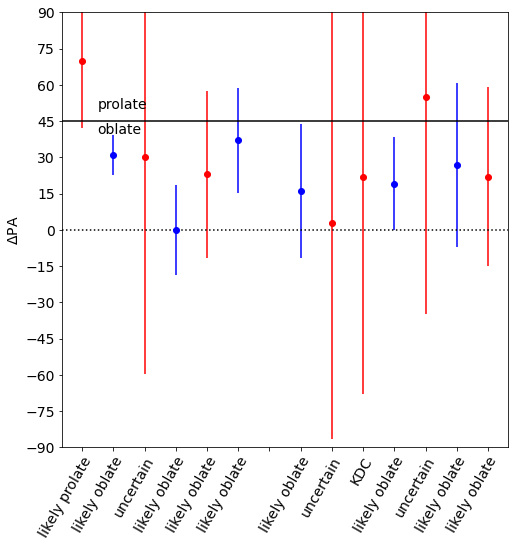

In [17]:
oblate_prolate = np.empty(14, dtype='U15')

fig, ax = plt.subplots(figsize=(8,8))
for i in range(14):
    if i == 6:
        oblate_prolate[i]=''
        continue
    delta_PA = classifications.loc[i, 'delta_PA']
    dPA = classifications.loc[i, 'dPA_kin']
    classification = classifications.loc[i, 'class']
    if classification == 'fast/regular':
        color='b' # black means fast/regular
    else:
        color='r' # read
    if i == 9:
        label='KDC'
        oblate_prolate[i]=label
    elif (delta_PA < 45) & (dPA < 45):
        label='likely oblate'
        oblate_prolate[i]=label
    elif (delta_PA > 45) & (dPA < 45):
        label='likely prolate'
        oblate_prolate[i]=label
    else:
        label='uncertain'
        oblate_prolate[i]=label
    ax.errorbar(i, delta_PA, yerr=dPA, marker='o', color=color)
ax.set_ylim(-90, 90)
ax.axhline(45, color='k')
ax.axhline(0, color='k', linestyle=':')
ax.annotate('prolate',(0.5,50))
ax.annotate('oblate',(0.5,40))
ax.set_xticks(range(14), labels=oblate_prolate, rotation=60, ha='right', rotation_mode='anchor')
ax.set_yticks(np.linspace(-90, 90, 13))
delta_pa_symbol = r'$\Delta$PA'
ax.set_ylabel(delta_pa_symbol, rotation=90)

In [50]:
classifications['oblate_prolate'] = oblate_prolate

In [51]:
# save
date = '011323'
classifications.to_csv(f'{data_dir}classification_table_{date}.csv',index=False)

In [57]:
oblate_prolate == 'likely oblate'

array([False,  True, False,  True, False,  True, False,  True, False,
       False,  True, False, False, False])

# What about delta_PA using the SLACS photometric PA?

In [95]:
slacs_delta_pa = np.empty(14)

for i in range(14):
    slacs_delta_pa[i] = min( [ np.abs(classifications.loc[i,'SLACS PA'] - classifications.loc[i,'PA_kin']),
                          180-np.abs(classifications.loc[i,'SLACS PA'] - classifications.loc[i,'PA_kin'])
                          ]
                           )

In [96]:
slacs_delta_pa

array([66.4, 34.9, 24.9,  1.5, 20.1,  6.3,  3.3, 19.7,  6. , 23. , -3.4,
       53.6, 20.7, 31.2])

In [101]:
classifications['SLACS delta_PA'] = slacs_delta_pa

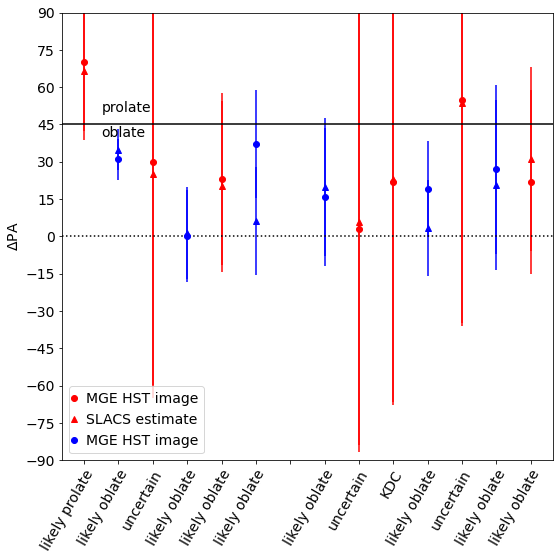

In [44]:
oblate_prolate = np.empty(14, dtype='U15')

fig, ax = plt.subplots(figsize=(8,8))
for i in range(14):
    if i == 6:
        oblate_prolate[i]=''
        continue
    delta_PA = classifications.loc[i, 'delta_PA']
    slacs_delta_PA = classifications.loc[i, 'SLACS delta_PA']
    dPA = classifications.loc[i, 'dPA_kin']
    classification = classifications.loc[i, 'class']
    if classification == 'fast/regular':
        color='b' # black means fast/regular
    else:
        color='r' # read
    if i == 9:
        label='KDC'
        oblate_prolate[i]=label
    elif (delta_PA < 45) & (dPA < 45):
        label='likely oblate'
        oblate_prolate[i]=label
    elif (delta_PA > 45) & (dPA < 45):
        label='likely prolate'
        oblate_prolate[i]=label
    else:
        label='uncertain'
        oblate_prolate[i]=label
    ax.errorbar(i, delta_PA, yerr=dPA, marker='o', color=color, label='MGE HST image')
    ax.errorbar(i, np.abs(slacs_delta_PA), yerr=dPA, marker='^', color=color, linestyle='--', label='SLACS estimate')
    #ax.errorbar(i, bspline_delta_PA, yerr=dPA, marker='s', color=color, linestyle='--', label='MGE b-spline model')
ax.set_ylim(-90, 90)
ax.axhline(45, color='k')
ax.axhline(0, color='k', linestyle=':')
ax.annotate('prolate',(0.5,50))
ax.annotate('oblate',(0.5,40))
ax.set_xticks(range(14), labels=oblate_prolate, rotation=60, ha='right', rotation_mode='anchor')
ax.set_yticks(np.linspace(-90, 90, 13))
delta_pa_symbol = r'$\Delta$PA'
ax.set_ylabel(delta_pa_symbol, rotation=90)
handles, labels = ax.get_legend_handles_labels()
handles = [h[0] for h in handles]
ax.legend(handles[0:3], labels[0:3], handlelength=0, loc='lower left')
plt.tight_layout()
plt.savefig(f'{data_dir}oblate_prolate_{date}.pdf')

# What about when I use the b-spline models?

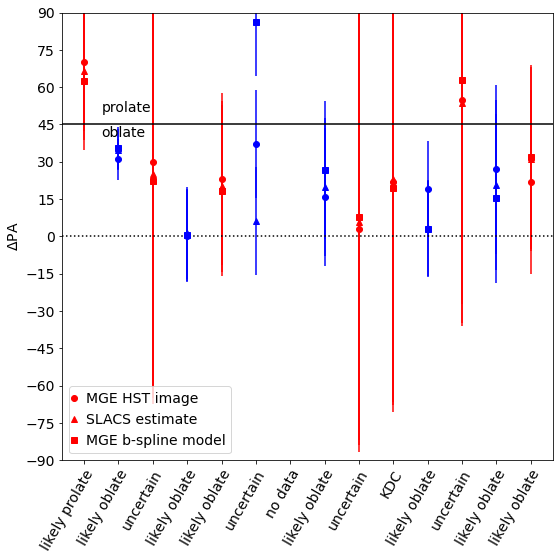

In [45]:
oblate_prolate = np.empty(14, dtype='U15')

fig, ax = plt.subplots(figsize=(8,8))
for i in range(14):
    if i == 6:
        oblate_prolate[i]='no data'
        continue
    delta_PA = classifications.loc[i, 'delta_PA']
    slacs_delta_PA = np.abs(classifications.loc[i, 'SLACS delta_PA'])
    bspline_delta_PA = classifications.loc[i, 'delta_PA_bspline']
    dPA = classifications.loc[i, 'dPA_kin']
    classification = classifications.loc[i, 'class']
    if classification == 'fast/regular':
        color='b' # black means fast/regular
    else:
        color='r' # read
    if i == 9:
        label='KDC'
        oblate_prolate[i]=label
    elif (delta_PA < 45) & (slacs_delta_PA < 45) & (bspline_delta_PA < 45) & (dPA < 45):
        label='likely oblate'
        oblate_prolate[i]=label
    elif (delta_PA > 45) & (slacs_delta_PA > 45) & (bspline_delta_PA > 45) & (dPA < 45):
        label='likely prolate'
        oblate_prolate[i]=label
    else:
        label='uncertain'
        oblate_prolate[i]=label
    ax.errorbar(i, delta_PA, yerr=dPA, marker='o', color=color, label='MGE HST image')
    ax.errorbar(i, slacs_delta_PA, yerr=dPA, marker='^', color=color, linestyle='--', label='SLACS estimate')
    ax.errorbar(i, bspline_delta_PA, yerr=dPA, marker='s', color=color, linestyle='--', label='MGE b-spline model')
ax.set_ylim(-90, 90)
ax.axhline(45, color='k')
ax.axhline(0, color='k', linestyle=':')
ax.annotate('prolate',(0.5,50))
ax.annotate('oblate',(0.5,40))
ax.set_xticks(range(14), labels=oblate_prolate, rotation=60, ha='right', rotation_mode='anchor')
ax.set_yticks(np.linspace(-90, 90, 13))
delta_pa_symbol = r'$\Delta$PA'
ax.set_ylabel(delta_pa_symbol, rotation=90)
handles, labels = ax.get_legend_handles_labels()
handles = [h[0] for h in handles]
ax.legend(handles[0:3], labels[0:3], handlelength=0, loc='lower left')
plt.tight_layout()
plt.savefig(f'{data_dir}oblate_prolate_{date}.pdf')

In [40]:
classifications.loc[8, 'ellipticity']

0.31

# The differences in the SLACS measurements do not affect the classification of prolate and oblate at all.

In [105]:
classifications

,obj_name,class,subclass,comments,ellipticity,SLACS ellipticity,effective_radius,SLACS PA,V_sigma,lambda_R,PA_phot,delta_PA,PA_kin,dPA_kin,oblate_prolate,SLACS delta_PA
0,SDSSJ0029-0055,slow/nonregular,"complex velocity, twist",V 60-80 km/s,0.13,0.160,2.16,26.6,0.107911,0.084878,23.427588,70.0,93.0,27.75,likely prolate,66.4
1,SDSSJ0037-0942,fast/regular,misaligned 31 deg,V 100 km/s,0.30,0.270,2.19,11.4,0.176446,0.158571,7.761124,31.0,156.5,8.25,likely oblate,34.9
2,SDSSJ0330-0020,uncertain,"possible rotation, misaligned 59 deg","Data poor, V 60 km/s",0.17,0.230,1.20,109.6,0.129017,0.109658,104.223376,30.0,134.5,89.75,uncertain,24.9
3,SDSSJ1112+0826,fast/regular,aligned 0 deg,V 100 km/s,0.24,0.230,1.50,137.5,0.263330,0.234192,136.098602,0.0,136.0,18.50,likely oblate,1.5
4,SDSSJ1204+0358,slow/nonregular,KDC,"V 40 km/s, signif arcs",0.09,0.030,1.47,132.1,0.077882,0.068771,135.080083,23.0,112.0,34.50,uncertain,20.1
5,SDSSJ1250+0523,fast/regular,"very round, alignment N/A","V 100 km/s, signif arcs",0.04,0.030,1.81,114.8,0.127693,0.112299,72.033772,37.0,108.5,21.75,likely oblate,6.3
6,SDSSJ1306+0600,fast/regular,misaligned 25 deg,"V 60 km/s, No HST image yet",-1.00,0.091,2.30,2.3,0.108517,0.091037,-1.000000,1.0,-1.0,-1.00,,3.3
7,SDSSJ1402+6321,fast/regular,misaligned 35 deg,V 60 km/s,0.22,0.230,2.70,70.8,0.095982,0.082576,75.302639,16.0,90.5,27.75,likely oblate,19.7
8,SDSSJ1531-0105,slow/nonregular,"no rotation, complex velocity, misaligned 41 deg",V 40 deg,0.31,0.320,2.50,143.5,0.078509,0.069539,145.972451,3.0,149.5,89.75,uncertain,6.0
9,SDSSJ1538+5817,fast/nonregular,"KDC, CRD? misaligned 22 deg","V 60 km/s outer, 20 deg inner",0.22,0.180,1.58,153.5,0.064735,0.049908,153.339746,22.0,130.5,89.75,uncertain,23.0


In [106]:
# save
date = '011323'
classifications.to_csv(f'{data_dir}classification_table_{date}.csv',index=False)